# RobustScaler for Unsupervised and Supervised Models

#### Using RobustScaler to scale the data before using unsupervised and supervised learning on the data to see if it provides a better model. 

<br>

#### Use 3+ supervised machine learning models covered in this class (remember the no free lunch theorem). Use SciKit Learn for this. You may use Tensorflow/Keras for neural networks models.

<br>

#### Use 3+ unsupervised machine learning models covered in this class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,228.969,239.541,113.201,0.00238,0.000010,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
1,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
2,110.739,113.597,100.139,0.00356,0.000030,0.00170,0.00200,0.00510,0.01484,0.133,...,0.01285,0.02261,0.00430,26.550,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
3,128.940,479.697,88.251,0.00581,0.000050,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
4,149.689,160.368,133.608,0.00257,0.000020,0.00116,0.00134,0.00349,0.01346,0.126,...,0.01059,0.01979,0.00578,27.421,0.365488,0.719974,-6.997403,0.210279,1.994387,0.112878
5,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
6,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
7,209.144,237.494,109.379,0.00282,0.000010,0.00147,0.00152,0.00442,0.01861,0.170,...,0.01382,0.02925,0.00871,25.554,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516
8,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
9,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


,status
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,0
8,0
9,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
1,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.00860,0.01841,0.00432,26.805,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
2,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.00726,0.01403,0.00065,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
3,145.174,198.109,80.637,0.00733,0.000050,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
4,169.774,191.759,151.451,0.01568,0.000090,0.00863,0.00946,0.02589,0.08143,0.821,...,0.08808,0.11411,0.07530,12.359,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,139.224,586.567,66.157,0.03011,0.000220,0.01854,0.01628,0.05563,0.09419,0.930,...,0.06023,0.16654,0.25930,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
172,198.116,233.099,174.478,0.02714,0.000140,0.01568,0.01699,0.04705,0.08684,1.018,...,0.08318,0.12851,0.16265,9.449,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
173,150.440,163.441,144.736,0.00396,0.000030,0.00206,0.00233,0.00619,0.02551,0.237,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
174,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


,status
0,0
1,0
2,0
3,1
4,1
...,...
171,1
172,1
173,1
174,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,200.714,223.982,89.686,0.00621,0.000030,0.00371,0.00337,0.01112,0.02286,0.207,...,0.01852,0.03576,0.00704,23.239,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
1,154.003,160.267,128.621,0.00183,0.000010,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
2,113.400,133.344,107.816,0.00451,0.000040,0.00219,0.00283,0.00658,0.04879,0.431,...,0.04370,0.07154,0.02278,19.013,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
3,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
4,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
5,179.711,225.930,144.878,0.00709,0.000040,0.00391,0.00419,0.01172,0.04313,0.442,...,0.03455,0.06892,0.07223,11.866,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
6,115.322,135.738,107.802,0.00619,0.000050,0.00352,0.00329,0.01057,0.03273,0.325,...,0.02931,0.04933,0.02810,19.388,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
7,222.236,231.345,205.495,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
8,152.845,163.305,75.836,0.00294,0.000020,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
9,122.336,142.369,94.794,0.00727,0.000060,0.00415,0.00339,0.01246,0.02293,0.223,...,0.01771,0.03615,0.03191,22.953,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546


,status
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,1
9,1


In [3]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_train_rob = rob_scaler.fit_transform(train_X)
X_val_rob = rob_scaler.transform(val_X)
X_test_rob = rob_scaler.transform(test_X)
display(X_train_rob)

array([[ 1.25048258,  0.59913269,  1.52526107, ..., -0.36047003,
        -0.76393587, -0.71751158],
       [ 1.16044021,  0.56653019,  0.8887929 , ...,  0.05942623,
        -0.47342507, -0.62570115],
       [ 0.58050847,  0.09192252,  1.04492998, ..., -0.32824536,
        -1.67096974, -0.98118103],
       ...,
       [-0.04030132, -0.36486397,  0.44457157, ..., -0.12380293,
        -0.00729813, -0.13563503],
       [ 0.53394539,  0.0727904 ,  0.99742573, ..., -0.22653787,
        -0.32604987, -0.77768814],
       [ 0.80475518,  0.28019436,  1.15391306, ..., -1.03020349,
         0.02131079, -0.48280943]])

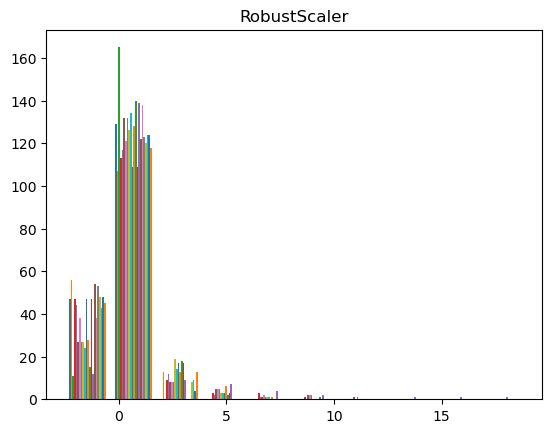

In [4]:
plt.hist(X_train_rob)
plt.title('RobustScaler')
plt.show()

## Isolation Forest for Anomaly Detection

In [5]:
#use the isolation forest model to search for anomalies on the scaled/transformed data
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

# Fit the model to the RobustScaler data
clf.fit(X_train_rob)

# create a column for the predictions of the RobustScaler data
df['anomaly_score'] = clf.decision_function(X_train_rob)
df['outlier'] = clf.predict(X_train_rob)
rob_anomaly_test = clf.decision_function(X_test_rob)
rob_anomalies_test = rob_anomaly_test < anomaly_threshold
rob_anomaly_val = clf.decision_function(X_val_rob)
rob_anomalies_val = rob_anomaly_val < anomaly_threshold
rob_train_out = df.loc[df['outlier'] == -1].index

# show the number of outliers for the RobustScaler data
print('RobustScaler')
print(df['outlier'].value_counts())
print(rob_anomalies_test)
print(rob_anomalies_val)
display(df.loc[df['outlier'] == -1])

RobustScaler
outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
43,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,1,-0.001802,-1
111,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.031077,-1


In [6]:
# Remove the outliers for each type of scaled/transformed data

X_train_no_outliers_rob = np.delete(X_train_rob, rob_train_out, axis=0)
y_train_no_outliers_rob = np.delete(train_y, rob_train_out)

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.270177,-1.0,-0.001802
1,1.0,0.233540,-1.0,-0.031077


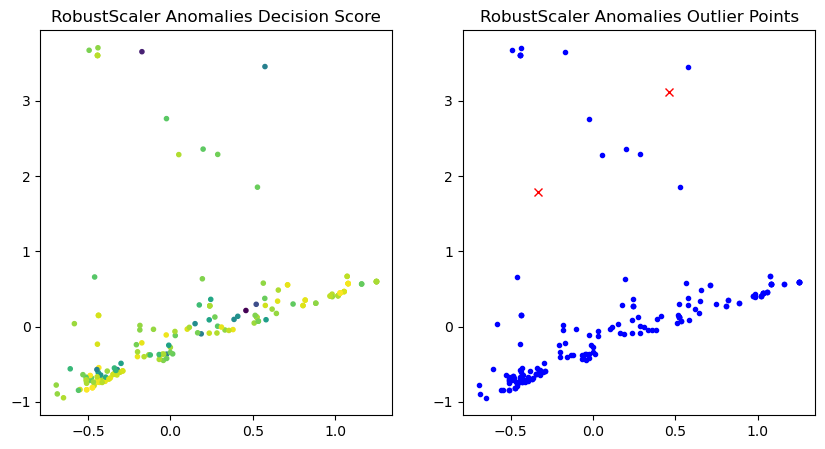

In [7]:
fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(10, 5))

clf.fit(X_train_rob)
predictions_rob = clf.predict(X_train_rob)

ax1.scatter(X_train_rob[:, 0], X_train_rob[:, 1], c=clf.decision_function(X_train_rob), marker='.')
ax1.set_title('RobustScaler Anomalies Decision Score')
ax2.plot(X_train_rob[predictions_rob==1][:,0], X_train_rob[predictions_rob==1][:,1], 'b.')
ax2.plot(X_train_rob[predictions_rob==-1][:,0], X_train_rob[predictions_rob==-1][:,-1], 'rx')
ax2.set_title('RobustScaler Anomalies Outlier Points')

df = pd.DataFrame(dict(predicted_label=clf.predict(X_train_rob), score=clf.decision_function(X_train_rob)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
rob_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(rob_scores)

## Experimenting on the RobustScaler data with Outliers Intact

### Experimenting with PCA for Dimensionality Reduction - RobustScaler

Component 1: Explained Variance 0.7758415228334431
Component 2: Explained Variance 0.8507270422222261
Component 3: Explained Variance 0.8926944774490084
Component 4: Explained Variance 0.9220751201873418
Component 5: Explained Variance 0.9434969435963411
Component 6: Explained Variance 0.9592285440729448
Component 7: Explained Variance 0.9700137976590477
Component 8: Explained Variance 0.9798069246534546
Component 9: Explained Variance 0.9852417109350303
Component 10: Explained Variance 0.989167800380263
Component 11: Explained Variance 0.9920886020117105
Component 12: Explained Variance 0.9948896926142395
Component 13: Explained Variance 0.9965453356020078
Component 14: Explained Variance 0.9978869244971261
Component 15: Explained Variance 0.9985639995884916
Component 16: Explained Variance 0.9991339194234554
Component 17: Explained Variance 0.9995224512132653
Component 18: Explained Variance 0.9997927277565755
Component 19: Explained Variance 0.9999664744685413
Component 20: Explaine

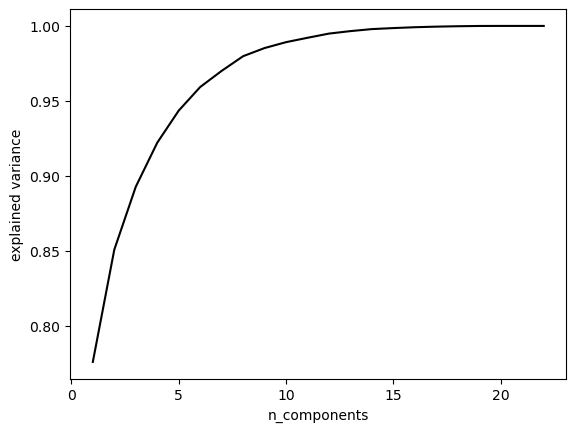

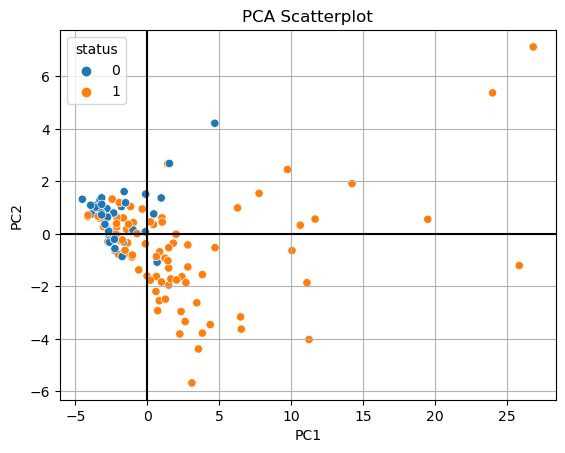

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.021737      0.003417     -0.030961        0.289849   
PC-2     0.108499      0.229281      0.100237        0.130755   
PC-3     0.366019      0.393151      0.309718       -0.131519   
PC-4    -0.039085      0.666939     -0.209357       -0.034123   
PC-5    -0.042103     -0.418725     -0.136127       -0.188401   
PC-6    -0.369627      0.372996     -0.365174       -0.058402   
PC-7    -0.160220      0.016488     -0.403103       -0.027109   
PC-8    -0.054965      0.123065      0.179948       -0.036667   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1          0.205449  0.328738  0.305271    0.328298      0.208436   
PC-2          0.071245  0.206476  0.044299    0.206294     -0.263814   
PC-3         -0.286578 -0.066601 -0.087030   -0.066440      0.169803   
PC-4         -0.034465 -0.119201 -0.055282   -0.119113     -0.050709   
PC-5         -0.032042 -0.179371 -0.407666   -0.179166

In [8]:
#use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA

#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_rob) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_rob = None
max_expvar_rob = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_rob:
        max_expvar_rob = explained_variance
        best_comp_rob = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 8)

#fit the model and transform the data
transformed_rob = pca.fit_transform(X_train_rob)

#create a dataframe of the transformed data
df_rob = pd.DataFrame(transformed_rob, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'])
df_rob['status'] = train_y

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_rob)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

#show components relations with features:
print(pd.DataFrame(pca.components_,columns=train_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))

### Experimenting with Hierarchical Clustering for Feature Selection - RobustScaler

#### HC on RobustScaler

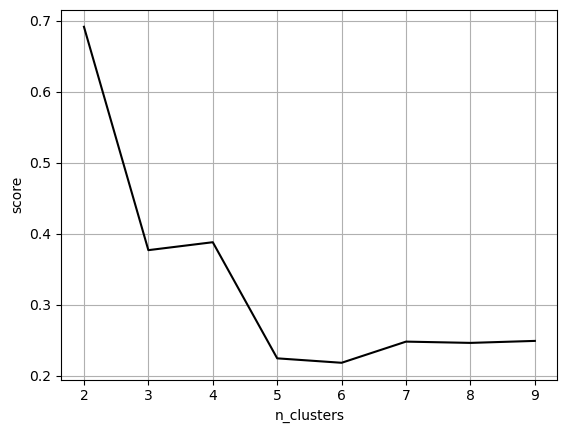

Cluster 2: Mean Silhouette Score: 0.6918123660836281
Cluster 3: Mean Silhouette Score: 0.37713759131065866
Cluster 4: Mean Silhouette Score: 0.38832147748766954
Cluster 5: Mean Silhouette Score: 0.22473025235227195
Cluster 6: Mean Silhouette Score: 0.2184762385584903
Cluster 7: Mean Silhouette Score: 0.24829360486825316
Cluster 8: Mean Silhouette Score: 0.24649240624786375
Cluster 9: Mean Silhouette Score: 0.24930226603716843


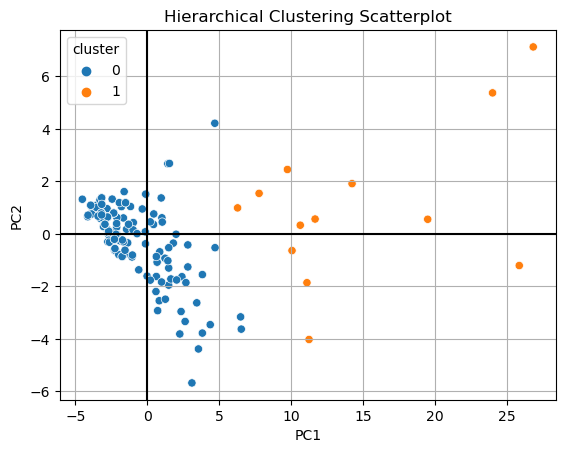

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler 0.11131955976061648


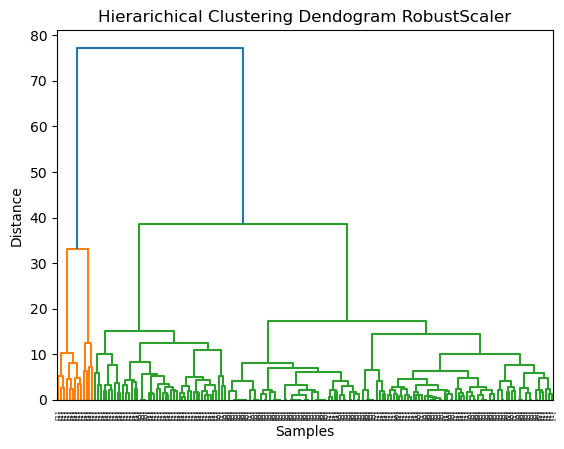

In [9]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(X_train_rob)

#create a column for the cluster
df_rob['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

Z = linkage(X_train_rob, method='ward')
#Z = linkage(X_train_rob, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarichical Clustering Dendogram RobustScaler')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df_rob['cluster']))

#### HC on RobustScaler scaled data and transformed by PCA

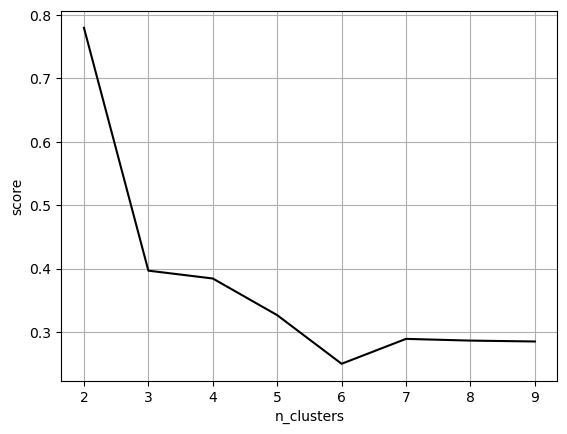

Cluster 2: Mean Silhouette Score: 0.7799491598929091
Cluster 3: Mean Silhouette Score: 0.3967147286551297
Cluster 4: Mean Silhouette Score: 0.3843373813968098
Cluster 5: Mean Silhouette Score: 0.32650797227355066
Cluster 6: Mean Silhouette Score: 0.2497675192093267
Cluster 7: Mean Silhouette Score: 0.28906259211691165
Cluster 8: Mean Silhouette Score: 0.28634877814914356
Cluster 9: Mean Silhouette Score: 0.28494757422945854


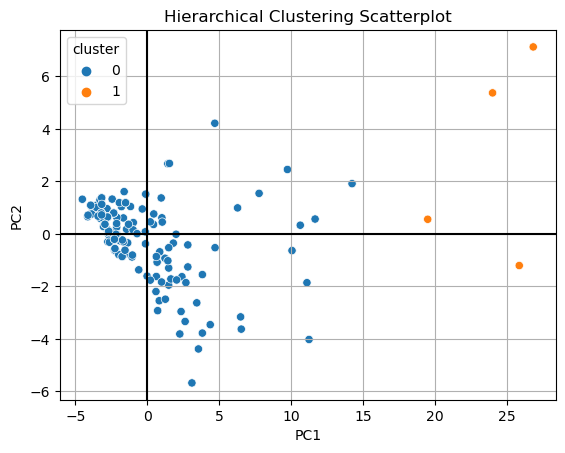

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler 0.03931075783093698


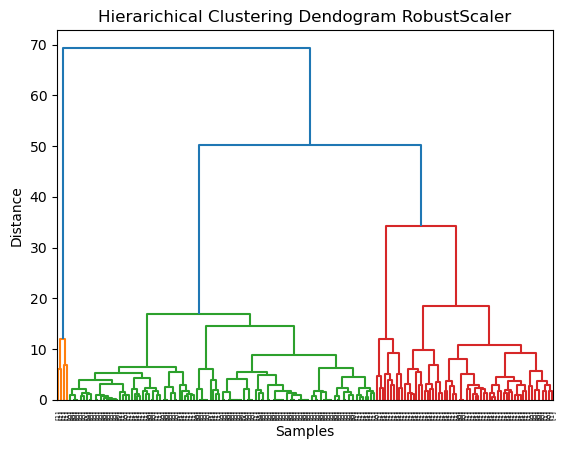

In [10]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(transformed_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(transformed_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(transformed_rob)

#create a column for the cluster
df_rob['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

Z = linkage(transformed_rob, method='ward')
#Z = linkage(X_train_rob, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarichical Clustering Dendogram RobustScaler')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df_rob['cluster']))

### Logistic Regression - RobustScaler

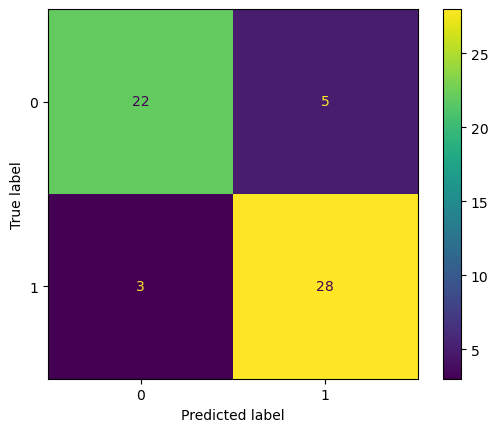

Accuracy:0.8620689655172413
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.85      0.90      0.88        31

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.get_params()

pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_rob)

log_model.fit(transformed_rob, train_y.to_numpy().ravel())

transformed_test = pca.transform(X_test_rob)

predictions_rob = log_model.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predictions_rob, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_rob, labels=log_model.classes_))

### Decision Tree - RobustScaler

In [12]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()
pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_rob)

# fit the model
dt.fit(transformed_rob, train_y.to_numpy().ravel())
transformed_test = pca.transform(X_test_rob)

predict_rob_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_rob_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.9655172413793104


Depth:1 and Scores:0.75
Depth:2 and Scores:0.7493464052287581
Depth:3 and Scores:0.8245098039215686
Depth:4 and Scores:0.8238562091503269
Depth:5 and Scores:0.8464052287581699
Depth:6 and Scores:0.8522875816993464
Depth:7 and Scores:0.8467320261437908
Depth:8 and Scores:0.8467320261437908
Depth:9 and Scores:0.8467320261437908
Depth:10 and Scores:0.8467320261437908
Depth:11 and Scores:0.8467320261437908
Depth:12 and Scores:0.8467320261437908
Depth:13 and Scores:0.8467320261437908
Depth:14 and Scores:0.8467320261437908
Feature:1 and Scores:0.8248366013071896
Feature:2 and Scores:0.7790849673202616
Feature:3 and Scores:0.8473856209150327
Feature:4 and Scores:0.8529411764705882
Feature:5 and Scores:0.8405228758169935
Feature:6 and Scores:0.8352941176470589
Feature:7 and Scores:0.823529411764706
Feature:8 and Scores:0.8408496732026144
Feature:9 and Scores:0.8594771241830065
Feature:10 and Scores:0.8584967320261437
Feature:11 and Scores:0.8470588235294118
Feature:12 and Scores:0.853594771241

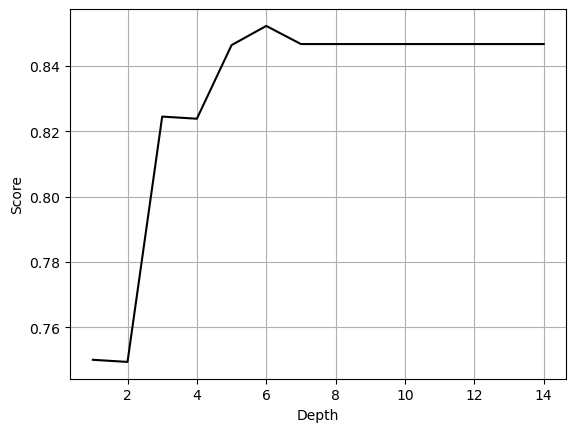

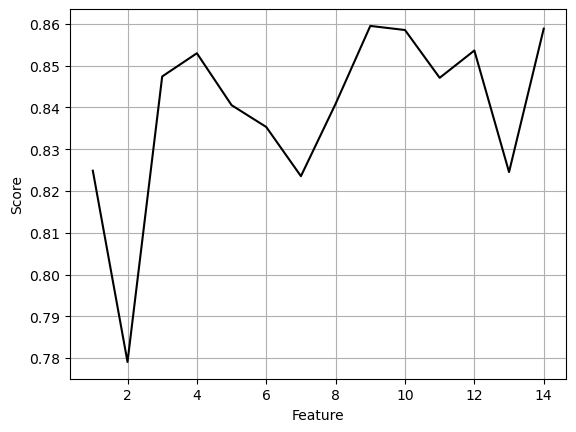

In [13]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_rob, train_y, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_rob, train_y, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()


<Figure size 8000x2000 with 0 Axes>

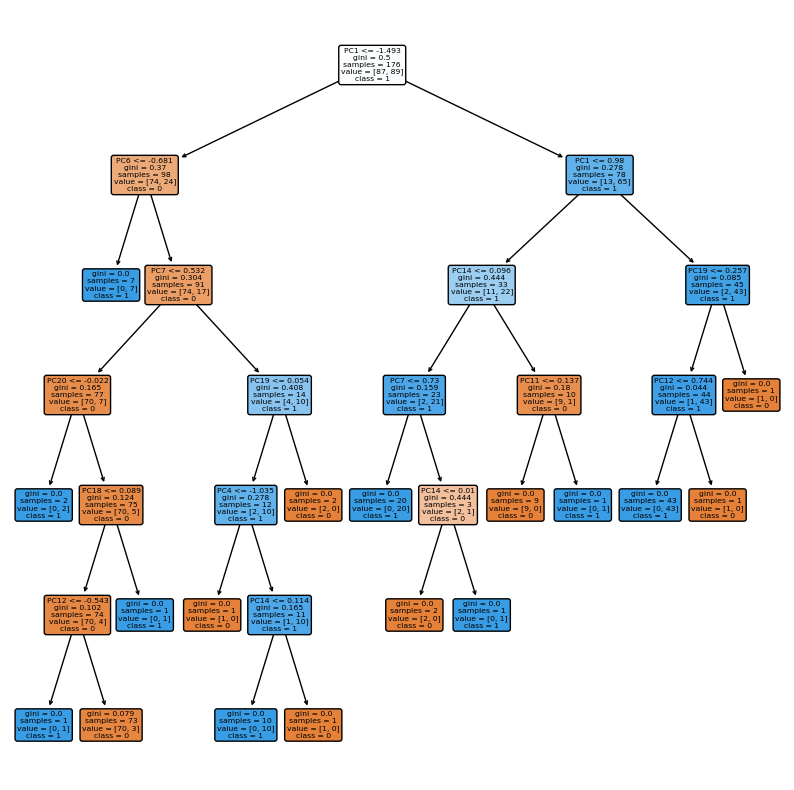

Best depth score: 6 and Best feature score: 9


In [14]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_rob = pca.fit_transform(X_train_rob)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+ 1)

dt.fit(transformed_rob, train_y)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()
print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

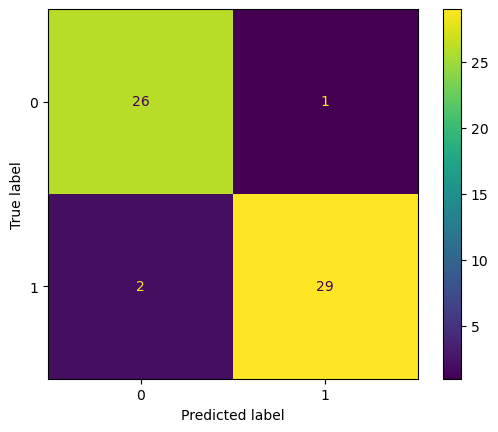

Accuracy of tuned model:0.9482758620689655


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores), max_features=np.argmax(fscores))
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores))
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores))

dt.fit(transformed_rob, train_y)

predict_rob_test = dt.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predict_rob_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_rob_test)
print(f'Accuracy of tuned model:{accuracy}')

## Experimenting on RobustScaler data with Outliers Removed

### Experimenting with PCA for Dimensionality Reduction - RobustScaler Outliers Removed

Component 1: Explained Variance 0.7201368286942356
Component 2: Explained Variance 0.8077739379064433
Component 3: Explained Variance 0.8637785676476915
Component 4: Explained Variance 0.9022736156775232
Component 5: Explained Variance 0.927717455536212
Component 6: Explained Variance 0.9483889990161268
Component 7: Explained Variance 0.9627442133774912
Component 8: Explained Variance 0.9751522959374735
Component 9: Explained Variance 0.9809161130802977
Component 10: Explained Variance 0.9860216153942876
Component 11: Explained Variance 0.9897824793839524
Component 12: Explained Variance 0.9932805533534949
Component 13: Explained Variance 0.9954821580852117
Component 14: Explained Variance 0.9972842827963886
Component 15: Explained Variance 0.9981919279247682
Component 16: Explained Variance 0.9989146434479605
Component 17: Explained Variance 0.9994322601189922
Component 18: Explained Variance 0.9997464755752697
Component 19: Explained Variance 0.9999602522208823
Component 20: Explaine

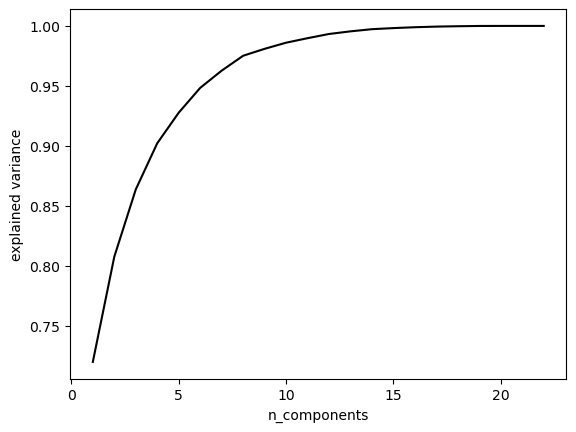

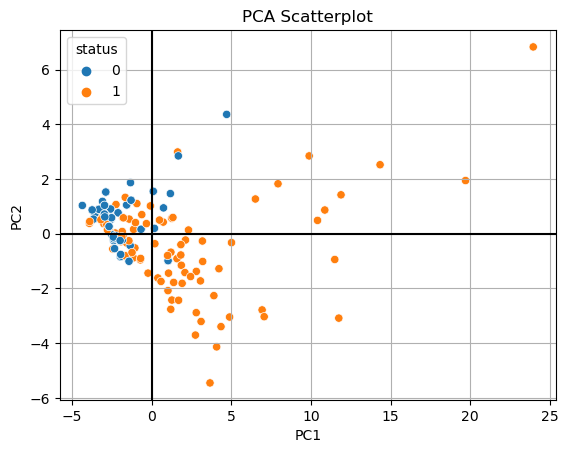

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.031276      0.009360     -0.048811        0.286019   
PC-2     0.132055      0.325607      0.104027        0.161114   
PC-3     0.352904      0.367272      0.293864       -0.144953   
PC-4    -0.050896      0.591845     -0.217257       -0.075922   
PC-5    -0.033928      0.552014      0.060503        0.133887   
PC-6    -0.370045      0.285749     -0.367739       -0.080556   
PC-7    -0.192482      0.019390     -0.415361       -0.041404   
PC-8     0.014471      0.090823      0.287591       -0.011070   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1          0.207006  0.317333  0.306350    0.316883      0.222620   
PC-2          0.057502  0.227153  0.108373    0.226926     -0.252264   
PC-3         -0.277336 -0.078654 -0.114936   -0.078490      0.187323   
PC-4         -0.049958 -0.162743 -0.119879   -0.162583     -0.035847   
PC-5          0.067304  0.126034  0.312432    0.125899

In [16]:
#use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers_rob) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_rob_no = None
max_expvar_rob_no = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_rob_no:
        max_expvar_rob_no = explained_variance
        best_comp_rob_no = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 8)

#fit the model and transform the data
transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

#create a dataframe of the transformed data
df_rob_no = pd.DataFrame(transformed_rob_no, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'])
df_rob_no['status'] = y_train_no_outliers_rob

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_rob_no)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()


#show components relations with features:
print(pd.DataFrame(pca.components_,columns=train_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))

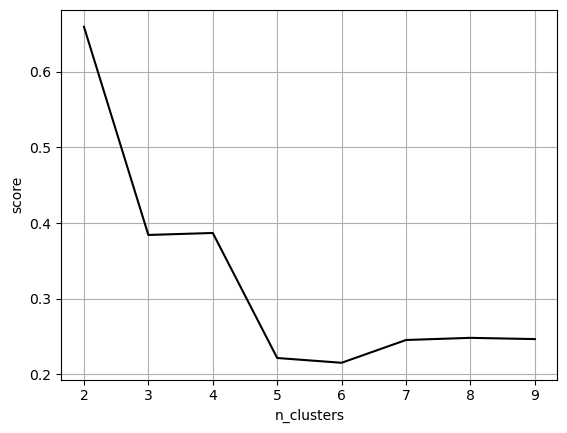

Cluster 2: Mean Silhouette Score: 0.6596913137068108
Cluster 3: Mean Silhouette Score: 0.3841777916505981
Cluster 4: Mean Silhouette Score: 0.3868002044154552
Cluster 5: Mean Silhouette Score: 0.2213286203383927
Cluster 6: Mean Silhouette Score: 0.21500272132591744
Cluster 7: Mean Silhouette Score: 0.245162815980699
Cluster 8: Mean Silhouette Score: 0.24800497299604446
Cluster 9: Mean Silhouette Score: 0.2463612698573116


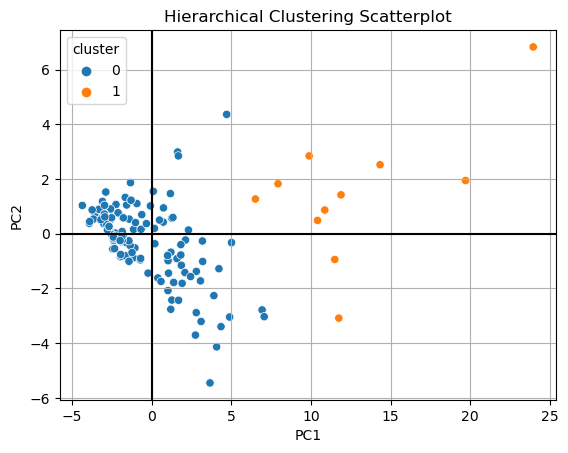

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler No Outliers 0.09894585474173036


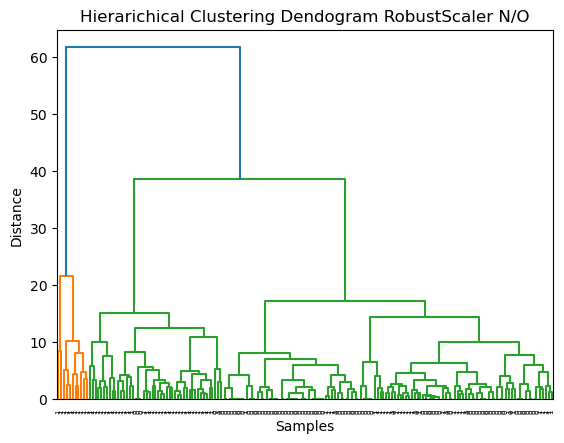

In [17]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(X_train_no_outliers_rob)


#create a column for the cluster
df_rob_no['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob_no)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()


Z = linkage(X_train_no_outliers_rob, method='ward')
#Z = linkage(X_train_no_outliers_rob, method='average')
dendrogram(Z, labels=y_train_no_outliers_rob)
plt.title('Hierarichical Clustering Dendogram RobustScaler N/O')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler No Outliers", 
      normalized_mutual_info_score(y_train_no_outliers_rob, df_rob_no['cluster']))

### Experimenting with Logistic Regression - RobustScaler Outliers Removed

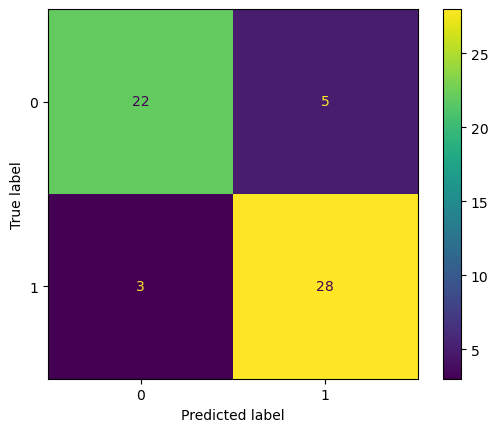

Accuracy:0.8620689655172413
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.85      0.90      0.88        31

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.get_params()

pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_no_outliers_rob)

log_model.fit(transformed_rob, y_train_no_outliers_rob.ravel())
transformed_test = pca.transform(X_test_rob)

predictions_rob_no = log_model.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predictions_rob_no, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob_no)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_rob_no, labels=log_model.classes_))

### Experimenting with Decision Tree - RobustScaler Outliers Removed

In [19]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()
pca = PCA(n_components = best_comp_rob_no)

transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

# fit the model
dt.fit(transformed_rob_no, y_train_no_outliers_rob)
transformed_test = pca.transform(X_test_rob)

predictions_rob_no = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predictions_rob_no)
accuracy

0.9310344827586207

Depth:1 and Scores:0.2463612698573116
Depth:2 and Scores:0.2463612698573116
Depth:3 and Scores:0.2463612698573116
Depth:4 and Scores:0.2463612698573116
Depth:5 and Scores:0.2463612698573116
Depth:6 and Scores:0.2463612698573116
Depth:7 and Scores:0.2463612698573116
Depth:8 and Scores:0.2463612698573116
Depth:9 and Scores:0.2463612698573116
Depth:10 and Scores:0.2463612698573116
Depth:11 and Scores:0.2463612698573116
Depth:12 and Scores:0.2463612698573116
Depth:13 and Scores:0.2463612698573116
Depth:14 and Scores:0.2463612698573116
Feature:1 and Scores:0.8222222222222223
Feature:2 and Scores:0.8042483660130719
Feature:3 and Scores:0.8058823529411765
Feature:4 and Scores:0.8281045751633986
Feature:5 and Scores:0.8169934640522876
Feature:6 and Scores:0.8683006535947712
Feature:7 and Scores:0.8326797385620915
Feature:8 and Scores:0.8516339869281045
Feature:9 and Scores:0.873529411764706
Feature:10 and Scores:0.8336601307189543
Feature:11 and Scores:0.8454248366013072
Feature:12 and Scores:

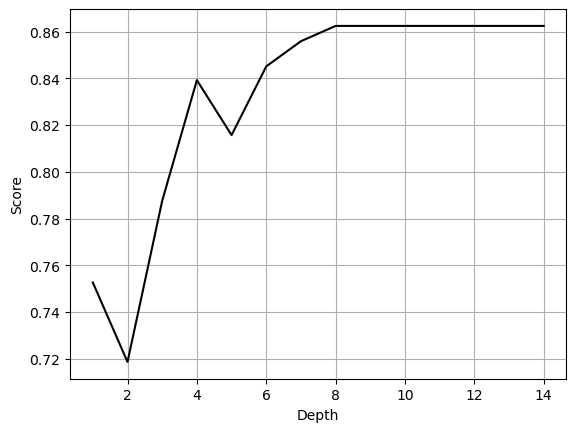

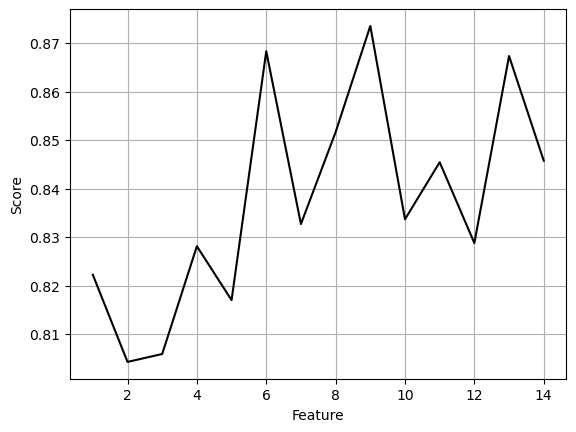

In [20]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_rob_no, y_train_no_outliers_rob, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{scores[-1]}')
    
feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_rob_no, y_train_no_outliers_rob, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

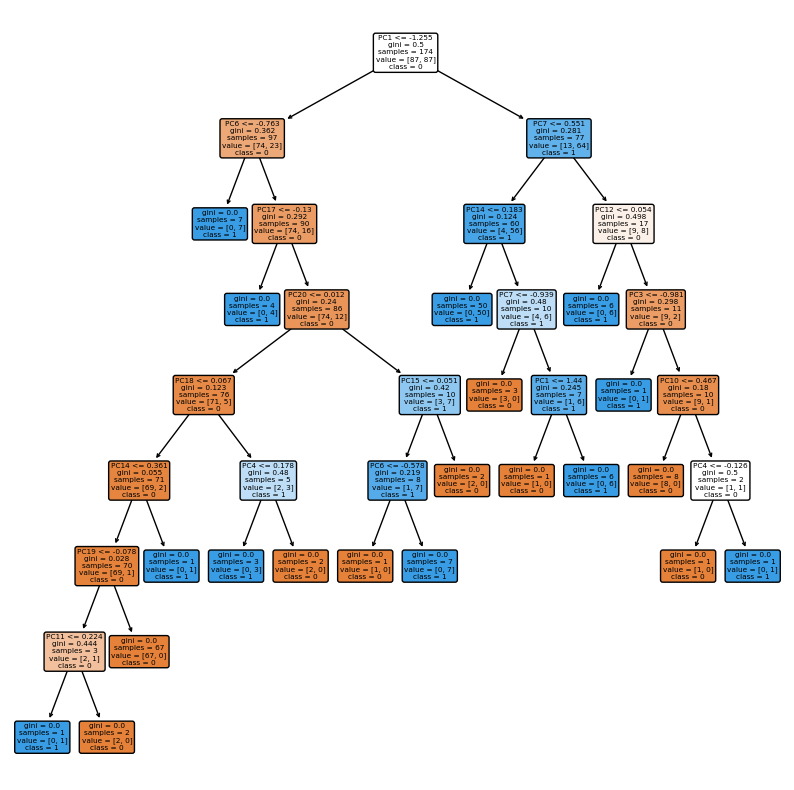

Best depth score: 8 and Best feature score: 9


In [23]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_rob_no, y_train_no_outliers_rob)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

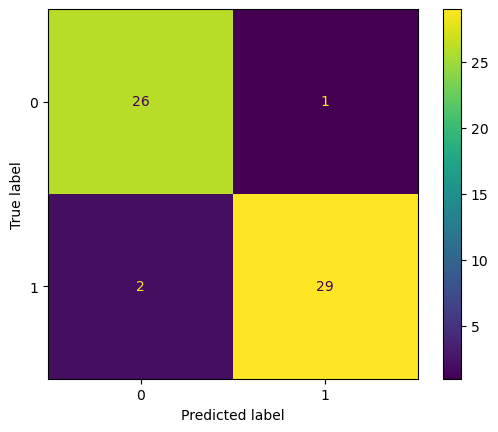

Accuracy of tuned model:0.9482758620689655


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores), max_features=np.argmax(fscores))
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores))
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores))

dt.fit(transformed_rob_no, y_train_no_outliers_rob)

predictions_rob_no = dt.predict(transformed_test)

cm_rob_no = confusion_matrix(test_y, predictions_rob_no, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_rob_no, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob_no)
print(f'Accuracy of tuned model:{accuracy}')